In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import json
import re

In [37]:
#import the archive csv file into a dataframe
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [38]:
# image predictions url 
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [39]:
# use requests library to import image predictions tsv file, open it and write it
response = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [40]:
# create a dataframe from the image-predictions file

image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [41]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [42]:
#Twitter changed access rules where one needs 'Essential' access and the developer account I created is not sufficient
# See error below
# Forbidden: 403 Forbidden
# 453 - You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this 
# endpoint, you’ll need to apply for Elevated access via the Developer Portal. You can learn more here: 
# https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve

In [43]:
#reading the downloaded 'tweet-json.txt' file and obtaining the 'tweet_id', 'retweet_count', and 'favorite_count'
thefile = open('tweet-json.json','r')
jsonstring = thefile.read()
p=re.compile("{\"created_at\".*}")
patternmatches = p.findall(jsonstring)
listofdicts = [json.loads(thestring) for thestring in patternmatches]
print()

retweet_and_favs_counts = pd.DataFrame()

for dic in listofdicts:
    newRow = {"id":dic["id"],"favorite_count":dic["favorite_count"],"retweet_count":dic["retweet_count"]}
    retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)


C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  retweet_and_favs_counts = retweet_and_favs_counts.append(newRow,ignore_index=True)
C:\Users\willn\AppData\Local\Temp\ipykernel_18848\1192045916.py:13: FutureWarning: The frame.append method is deprecated and will be removed f

In [44]:
# inspect the resulting dataframe

retweet_and_favs_counts.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [45]:
#saving a copy of the extracted information in a .txt file and a .csv file for visual data assessment
retweet_and_favs_counts.to_csv('retweet_and_favs_counts.txt', encoding='utf-8', index=False)
retweet_and_favs_counts.to_csv('retweet_and_favs_counts.csv', encoding='utf-8', index=False)

# Data Assessment

The assessment seen below is done programmatically. Each data source has been saved as a .csv file so it can be opened in Excel. Using those versions I performed a visual analysis on each data source visually in Excel. 

In [46]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1506,785533386513321988,https://pbs.twimg.com/media/CubGchjXEAA6gpw.jpg,2,miniature_pinscher,0.436023,True,black-and-tan_coonhound,0.258049,True,Rottweiler,0.145231,True
929,702932127499816960,https://pbs.twimg.com/media/CcFRCfRW4AA5a72.jpg,1,wallaby,0.410710,False,wombat,0.239332,False,beaver,0.149605,False
1194,740359016048689152,https://pbs.twimg.com/media/CkZImGVUoAAwv0b.jpg,1,golden_retriever,0.863687,True,kuvasz,0.048590,True,Labrador_retriever,0.047397,True
1076,717421804990701568,https://pbs.twimg.com/media/CfTLUYWXEAEkyES.jpg,2,miniature_pinscher,0.286479,True,Italian_greyhound,0.084134,True,beagle,0.064697,True
208,669970042633789440,https://pbs.twimg.com/media/CUw2MV4XIAAHLO_.jpg,1,miniature_pinscher,0.734744,True,Rottweiler,0.131066,True,Doberman,0.081509,True
221,670093938074779648,https://pbs.twimg.com/media/CUym4Y5WsAEiI9_.jpg,1,toy_poodle,0.383346,True,miniature_poodle,0.153678,True,chow,0.138543,True
1926,857746408056729600,https://pbs.twimg.com/media/C-dTzBzXUAQRjYz.jpg,1,Labrador_retriever,0.919832,True,beagle,0.043513,True,golden_retriever,0.023359,True
2047,886736880519319552,https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg,1,kuvasz,0.309706,True,Great_Pyrenees,0.186136,True,Dandie_Dinmont,0.086346,True
1850,840268004936019968,https://pbs.twimg.com/media/C6k7SaEXUAg83_J.jpg,3,Chesapeake_Bay_retriever,0.863987,True,Labrador_retriever,0.052632,True,kelpie,0.032574,True
892,699413908797464576,https://pbs.twimg.com/media/CbTRPXdW8AQMZf7.jpg,1,Samoyed,0.517479,True,malamute,0.155935,True,Eskimo_dog,0.095001,True


In [47]:
image_predictions.shape

(2075, 12)

In [50]:
sum(image_predictions.duplicated())

0

In [51]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [52]:
df_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1608,685641971164143616,NaN,NaN,2016-01-09 01:59:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Otis. He just passed a cop while going...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685641971...,7,10,Otis,None,None,pupper,None
510,812372279581671427,NaN,NaN,2016-12-23 19:00:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moe. He's a fetty woof. Got a cardboar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/812372279...,13,10,Moe,None,None,None,None
57,881268444196462592,NaN,NaN,2017-07-01 21:49:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Elliot. He's a Canadian Forrest Pup. Unus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881268444...,12,10,Elliot,None,None,None,None
1580,687127927494963200,NaN,NaN,2016-01-13 04:23:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gordon. He's an asshole. 9/10 would still...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687127927...,9,10,Gordon,None,None,None,None
480,815736392542261248,NaN,NaN,2017-01-02 01:48:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Akumi. It's his birthday. He received ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815736392...,11,10,Akumi,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2264,667538891197542400,NaN,NaN,2015-11-20 03:04:08 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667538891...,9,10,a,None,None,None,None
861,763103485927849985,NaN,NaN,2016-08-09 20:03:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Belle. She's a Butterflop Hufflepoof. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/763103485...,10,10,Belle,None,None,None,None
2144,669942763794931712,NaN,NaN,2015-11-26 18:16:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Andru. He made his very own lacrosse s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669942763...,11,10,Andru,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None


In [53]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [54]:
sum(df_twitter_archive.duplicated())

0

In [55]:
sum(df_twitter_archive.source.duplicated())

2352

In [56]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [57]:
retweet_and_favs_counts.sample(10)

,id,favorite_count,retweet_count
2259,667549055577362432,6138,2454
1094,736365877722001409,4367,1408
1512,691090071332753408,1867,385
1104,734787690684657664,13745,7102
710,784517518371221505,10039,2970
847,766008592277377025,4149,571
2196,668815180734689280,610,291
1829,676215927814406144,1881,661
1492,692568918515392513,4739,1737
734,781163403222056960,10895,3168


In [58]:
retweet_and_favs_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Quality Issues


- For this investigation we are only interested in original dog ratings, thus retweets are not necessary. I will remove the rows that are retweets so the dataset only contains original tweets with ratings.
- There are a number of names that appear to be incorrect. All names start with capital letters and there are numerous names that begin with lowercase letters and are not names at all (Ex. 'a', 'an', 'very', 'such', just', 'by', and more). These names need to be replaced with 'None' as we do not know the intended name.
- The "source" column in the Twitter Archive dataframe is full of duplicates, not useful for this investigation and can be removed. 
- The 'tweet_id' column in the twitter_archive_cleaning_df, image_predictions, and retweet_and_favs_counts respective dataframes are in integer format. As no mathematical calculations will be performed on this column, string format would be more appropriate. The same goes for the 'id' column in the retweets_and_favs_df that we created.
- Timestamp has trailing 0's that serve no purpose and make the column unnecessarily wide as well as being in string format which needs to be datetime format.
- The columns related to retweeting and id's ('retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp') associated with retweets are superfluous and not needed for this investigation and can be removed,
- The columns related to 'in reply to,' 'in_reply_to_status_id' and 'in_reply_to_user_id' are superfluous and not needed for this investigation and can be removed.
- The rating_denominator column needs to have a standardized value of 10. Virtually every single value in that column is 10 except a few outliers less than 10 and more than 10. I will remove the outlier rows provided they are few and their removal will not drastically affect my investigation.
- The rating_numerator column needs to have outlier values removed. Virtually every value in the numerator column is between 10 and 20 and for the sake of this investigation I will assume that is the intended system/scale. I will remove the outlier rows provided they are few and their removal will not drastically affect my investigation.
- The expanded_urls column adds no value to my investigation and should be dropped.
- The 3 predictions columns in the image_predictions dataframe have some glaring inconsitencies; if the dog breed prediction has more than one word the words are separated by _ as well some words are capitalized and some are not. For searching purposes it would be more intuitive to remove the underscore between the words and make sure that the case of all the characters are the same; I will remove the underscores and make sure all words in those prediction columns are lowercase across the board.

## Tidiness Issues

- There are 4 columns describing the 'stage' of the dog, 'doggo', 'floofer', 'pupper', and 'puppo'. This can be cleaned up by having a single 'stage' column with the correct descriptor.
- We have 3 dataframes that are all referencing the same data. It would be prudent to merge these dataframes into one master dataset after cleaning has been done.

# Cleaning

Create copies of the original data to work with so the integrity of the original data stays as is.

In [24]:
twitter_archive_cleaning_df = df_twitter_archive.copy()
image_predictions_cleaning_df = image_predictions.copy()
retweets_and_favs_cleaning_df = retweet_and_favs_counts.copy()

## Cleaning Task 1 (Removing RT Rows)

In [59]:
# create 3 dfs of in which only non-null values for one of the retweet columns are included
testing_df = twitter_archive_cleaning_df.loc[twitter_archive_cleaning_df['retweeted_status_id'].notnull()]
testing_df1 = twitter_archive_cleaning_df.loc[twitter_archive_cleaning_df['retweeted_status_user_id'].notnull()]
testing_df2 = twitter_archive_cleaning_df.loc[twitter_archive_cleaning_df['retweeted_status_timestamp'].notnull()]

In [60]:
# inspect the temporary dfs and make certain they are identical so we can be sure that if there is an entry in one of those
# columns there is also an entry in the other two columns
testing_df.shape, testing_df1.shape, testing_df2.shape

((0, 17), (0, 17), (0, 17))

In [61]:
# we can get rid of the rows we do not want by filtering by just one of the columns in question where those values are null

twitter_archive_cleaning_df = twitter_archive_cleaning_df.loc[twitter_archive_cleaning_df['retweeted_status_id'].isnull()]

In [62]:
# we can test by creating a temp df where it is filtered by one of the other columns in question searching for non-null values

temp = twitter_archive_cleaning_df.loc[twitter_archive_cleaning_df['retweeted_status_user_id'].notnull()]

In [63]:
# viewing the df shows us that the retweet rows have been removed/filtered out

temp

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Quality Cleaning Task 2 (Incorrect Names)

In [64]:
# after visual inspection of the 'name' column I found many lowercase names that are not names at all
# create a list of the erroneous names found in visual inspection via Excel and a pivot table
incorrect_names_list = list(twitter_archive_cleaning_df.query('name == "a" or name == "an" or name == "all" or name == "by" or name == "just" or name == "life" or name == "light" or name == "my" or name == "not" or name == "not" or name == "old" or name == "such" or name == "quite" or name == "the" or name == "very"').index)

In [65]:
# loop through the inncorrect names list and replace the incorrect names with 'None'
for index in incorrect_names_list:
       twitter_archive_cleaning_df.name[index] = 'None'

C:\Users\willn\AppData\Local\Temp\ipykernel_18848\128532003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_cleaning_df.name[index] = 'None'


In [66]:
# programmatically check to see if the incorrect names have been removed and replaced with "None" 
# if nothing prints this operation has succeeded
for index in incorrect_names_list:
    if twitter_archive_cleaning_df.name[index] != 'None':
        print('still needs to be replaced')

## Quality Cleaning Task 3 (Source Column Duplicates)

When looking at the source column in the twitter_archive_cleaning_df we can see that 2352 out of the 2356 rows have identical values. This information serves no purpose and as each value is a duplicate, we can drop this column for our investigation to cull unneccessary information.

In [67]:
# check the total number of rows in twitter_archive_cleaning_df
twitter_archive_cleaning_df.shape

(2175, 17)

In [68]:
# get the sum of duplicate values in the 'source' column of twitter_archive_cleaning_df; simple subtraction of the first value 
# in the tuple above from .shape and the number obtained from the sum() function checking for duplicates shows us that only
# 4 values are not duplicates
sum(twitter_archive_cleaning_df.source.duplicated())

2171

In [69]:
# drop the 'source' column from the twitter_archive_cleaning_df 
twitter_archive_cleaning_df.drop('source', axis=1, inplace=True)

In [70]:
# we can see there are 16 columns where there was 17 
twitter_archive_cleaning_df.shape

(2175, 16)

In [71]:
# double check to make sure the 'source' column has been dropped; it was between the 'timestamp' and 'text' columns and is now gone
twitter_archive_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   text                        2175 non-null   object 
 5   retweeted_status_id         0 non-null      float64
 6   retweeted_status_user_id    0 non-null      float64
 7   retweeted_status_timestamp  0 non-null      object 
 8   expanded_urls               2117 non-null   object 
 9   rating_numerator            2175 non-null   int64  
 10  rating_denominator          2175 non-null   int64  
 11  name                        2175 non-null   object 
 12  doggo                       2175 non-null   object 
 13  floofer                     2175 

## Quality Cleaning Tasks 4 & 5 (Changing Datatypes for 'tweet_id', 'retweet_count', 'favorite_count' and 'timestamp')

We can change the datatypes for both column instances of 'tweet_id' in the twitter_archive_cleaning_df and image_predictions dataframes to string format as well as changing the timestamp column in the twitter_archive_cleaning_df from string to datetime64 formate in one cell. 

We also can change the datatypes for 'retweet_count' and 'favorite_count' in the retweets_and_favs_cleaning_df from float to int as every value in that column represents a whole number, it is not possible to have a partial retweet or partial favorite.

In [72]:
# changing datatypes as specified in above Markdown cell
twitter_archive_cleaning_df.tweet_id = twitter_archive_cleaning_df.tweet_id.astype(str)
image_predictions_cleaning_df.tweet_id = image_predictions_cleaning_df.tweet_id.astype(str)
retweets_and_favs_cleaning_df.id = retweets_and_favs_cleaning_df.id.astype(str)
retweets_and_favs_cleaning_df.retweet_count = retweets_and_favs_cleaning_df.retweet_count.astype(int)
retweets_and_favs_cleaning_df.favorite_count = retweets_and_favs_cleaning_df.favorite_count.astype(int)
twitter_archive_cleaning_df.timestamp = twitter_archive_cleaning_df.timestamp.astype('datetime64')

In [73]:
# ensure datatypes have changed for 'tweet_id' and 'timestamp'
twitter_archive_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   datetime64[ns]
 4   text                        2175 non-null   object        
 5   retweeted_status_id         0 non-null      float64       
 6   retweeted_status_user_id    0 non-null      float64       
 7   retweeted_status_timestamp  0 non-null      object        
 8   expanded_urls               2117 non-null   object        
 9   rating_numerator            2175 non-null   int64         
 10  rating_denominator          2175 non-null   int64         
 11  name                        2175 non-null   object      

In [74]:
# ensure 'tweet_id' datatype changed to string from int
image_predictions_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [75]:
# ensure favorite_count and retweet_count datatypes have changed to int
retweets_and_favs_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   favorite_count  2354 non-null   int32 
 2   retweet_count   2354 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 36.9+ KB


## Quality Cleaning Tasks 6 & 7 (Unnecessary Columns)

The columns related to retweeting and id's ('retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp') associated with retweets are superfluous and not needed for this investigation and can be removed,
The columns related to 'in reply to,' 'in_reply_to_status_id' and 'in_reply_to_user_id' are superfluous and not needed for this investigation and can be removed.
None of these columns provide useful information to this investigation and most of the values in the column are empty. For the sake of consolidating useful information for investigation these 4 rows can be removed from twitter_archive_cleaning_df to make the table less crowded with columns that provide nothing needed.

In [76]:
# check the shape to see how many columns are present before removal of superfluous columns
twitter_archive_cleaning_df.shape

(2175, 16)

In [77]:
# remove unneeded columns from twitter_archive_cleaning_df
twitter_archive_cleaning_df.drop('in_reply_to_status_id', axis=1, inplace=True)
twitter_archive_cleaning_df.drop('in_reply_to_user_id', axis=1, inplace=True)
twitter_archive_cleaning_df.drop('retweeted_status_id', axis=1, inplace=True)
twitter_archive_cleaning_df.drop('retweeted_status_user_id', axis=1, inplace=True)
twitter_archive_cleaning_df.drop('retweeted_status_timestamp', axis=1, inplace=True)

In [78]:
# ensure 5 columns have been removed
twitter_archive_cleaning_df.shape

(2175, 11)

In [79]:
# visually inspect the dataframe to ensure correct columns removed
twitter_archive_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   text                2175 non-null   object        
 3   expanded_urls       2117 non-null   object        
 4   rating_numerator    2175 non-null   int64         
 5   rating_denominator  2175 non-null   int64         
 6   name                2175 non-null   object        
 7   doggo               2175 non-null   object        
 8   floofer             2175 non-null   object        
 9   pupper              2175 non-null   object        
 10  puppo               2175 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 268.4+ KB


## Quality Cleaning Task 8 (Standardizing Denominator Column)

As seen in our programmatic assessment using the .describe() method on our original df_twitter_archive (which was used to create twitter_archive_cleaning_df) the denominator column has some values that need to be looked at further and cleaned. Specifically an examination of that particular column we are able to see that the minimum value is 0 and the max is 170. There are only 23 rows where the denominator is not 10. For the sake of consistency we can remove these rows as we do not know if the numerators that are not 10 are the result of a typo as there is no way to check that. 

In [86]:
twitter_archive_cleaning_df.rating_denominator.describe()

count    2153.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

In [87]:
# confirm the number of rows with denominators != 10
len(twitter_archive_cleaning_df.loc[twitter_archive_cleaning_df['rating_denominator'] != 10])

0

In [88]:
# create a list with the index values of the 23 rows that are != 10
denominator_drops = list(twitter_archive_cleaning_df.query('rating_denominator != 10').index)

In [89]:
# drop the rows via their index that have denominators != 10
twitter_archive_cleaning_df.drop(index=denominator_drops, inplace=True)

In [90]:
# confirm the number of rows with denominators != 10 is 0
len(twitter_archive_cleaning_df.loc[twitter_archive_cleaning_df['rating_denominator'] != 10])

0

In [91]:
twitter_archive_cleaning_df.rating_denominator.describe()

count    2153.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

## Quality Cleaning Task 9 (Removing Numerator Outliers)

From our programmatic investigation earlier we can see that there is at least 1 numerator with a value of 0 as the minimum value in the .describe() method is 0. We can also see that there are some outlier numerator values as the max value is 1776. As we cannot be certain why these values were entered that way it would be best to remove values of 0 or values over 20, as the majority of numerator values in this data set is between 10 and 20. There are a substantial number of numerator values between 1 and 10(non-inclusive) that will have to be left as they are as removing them would remove a significant portion of the data set. These values betweeen 1-10(non-inclusive) could be typos but fall within a reasonable and feasible range.

In [92]:
twitter_archive_cleaning_df.rating_numerator.describe()

count    2153.000000
mean       12.250813
std        42.679419
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [93]:
len(twitter_archive_cleaning_df[twitter_archive_cleaning_df['rating_numerator'] > 20])

8

In [94]:
len(twitter_archive_cleaning_df[twitter_archive_cleaning_df['rating_numerator'] == 0])

2

In [95]:
(twitter_archive_cleaning_df[twitter_archive_cleaning_df['rating_numerator'] < 10])

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,2017-04-01 16:35:01,This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,2017-02-24 15:40:31,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,2017-02-01 01:11:25,"I was going to do 007/10, but the joke wasn't ...",NaN,7,10,None,None,None,None,None
730,781661882474196992,2016-09-30 01:08:10,Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,None,None,None


In [96]:
twitter_archive_cleaning_df = twitter_archive_cleaning_df[twitter_archive_cleaning_df['rating_numerator']!= 0]
twitter_archive_cleaning_df = twitter_archive_cleaning_df[twitter_archive_cleaning_df['rating_numerator'] <= 20]


In [97]:
twitter_archive_cleaning_df.rating_numerator.describe()

count    2143.000000
mean       10.631825
std         2.176235
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        17.000000
Name: rating_numerator, dtype: float64

## Quality Cleaning Task 10 (Unnessary Column)

The 'expanded_urls' column is superfluous and adds nothing to this investigation. 

In [98]:
# drop 'expanded_urls' column
twitter_archive_cleaning_df.drop('expanded_urls', axis=1, inplace=True)

In [99]:
# ensure 'expanded_urls' column has been dropped
twitter_archive_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2143 non-null   object        
 1   timestamp           2143 non-null   datetime64[ns]
 2   text                2143 non-null   object        
 3   rating_numerator    2143 non-null   int64         
 4   rating_denominator  2143 non-null   int64         
 5   name                2143 non-null   object        
 6   doggo               2143 non-null   object        
 7   floofer             2143 non-null   object        
 8   pupper              2143 non-null   object        
 9   puppo               2143 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 184.2+ KB


In [100]:
# visually inspect to ensure 'expanded_urls' column has been dropped
twitter_archive_cleaning_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


## Quality Cleaning Task 11 (Image prediction inconsistencies)

As stated in my description of cleaning tasks above. Each of the 3 prediction columns in the image_prediction columns, p1, p2, and p3, respectively, have some inconsistencies that need to be corrected for my investigation. Those that I will address are the underscore(s) between words and making sure all characters are consistent in their case by making all characters lowercase.

In [101]:
# update/change the p1, p2, and p3 columns making them consistent by replacing underscores with spaces between words and
# ensuring case consistency by making sure anything in those columns is in lowercase
image_predictions_cleaning_df.update(image_predictions_cleaning_df[['p1', 'p2', 'p3']].apply(lambda c: c.str.lower().str.replace('_', ' ')))

In [102]:
# obtain a sample to make sure the above line of code did what is was supposed to do, remove underscores between words and
# make any string in the p1, p2, and p3 columns is in lowercase
image_predictions_cleaning_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1465,778624900596654080,https://pbs.twimg.com/media/Cs47N3eWcAEmgiW.jpg,2,airedale,0.786089,True,irish terrier,0.121488,True,lakeland terrier,0.014603,True
2009,878281511006478336,https://pbs.twimg.com/media/DDBIX9QVYAAohGa.jpg,1,basset,0.320420,True,collie,0.215975,True,appenzeller,0.128507,True
1969,868622495443632128,https://pbs.twimg.com/media/DA33i0XXsAEQtCA.jpg,1,labrador retriever,0.868107,True,great pyrenees,0.060973,True,saint bernard,0.033489,True
321,671855973984772097,https://pbs.twimg.com/media/CVLpciDW4AAleh-.jpg,1,chimpanzee,0.636031,False,gorilla,0.098751,False,fountain,0.031755,False
1702,817171292965273600,https://pbs.twimg.com/media/C1cs8uAWgAEwbXc.jpg,1,golden retriever,0.295483,True,irish setter,0.144431,True,chesapeake bay retriever,0.077879,True
107,667873844930215936,https://pbs.twimg.com/media/CUTDtyGXIAARxus.jpg,1,common iguana,0.999647,False,frilled lizard,0.000181,False,african chameleon,0.000128,False
831,693642232151285760,https://pbs.twimg.com/media/CaBP7i9W0AAJrIs.jpg,1,scottish deerhound,0.111893,True,bluetick,0.074302,True,german short-haired pointer,0.067000,True
750,687826841265172480,https://pbs.twimg.com/media/CYum3KbWEAArFrI.jpg,1,pomeranian,0.997210,True,pekinese,0.000803,True,keeshond,0.000373,True
1337,758405701903519748,https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg,4,chesapeake bay retriever,0.702954,True,laptop,0.092277,False,notebook,0.032727,False
1567,794205286408003585,https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg,3,pedestal,0.662660,False,fountain,0.294827,False,brass,0.020371,False


## Tidiness Cleaning Task 1 (Consolidating 'stage' columns into one column)

The 4 columns that roughly equate to the stage of life of the dog in a fun creative way could be consolidated to 1 column that lists their classification or 'None'. 

In [103]:
# ensure that the only values in the 'doggo' column are 'doggo' or 'None' and equal the total rows of the 
# twitter_archive_cleaning_df which there are 2322 rows
twitter_archive_cleaning_df.doggo.value_counts(), sum(twitter_archive_cleaning_df.doggo.value_counts())


(None     2056
 doggo      87
 Name: doggo, dtype: int64,
 2143)

In [104]:
# ensure that the only values in the 'pupper' column are 'pupper' or 'None' and equal the total rows of the 
# twitter_archive_cleaning_df which there are 2322 rows
twitter_archive_cleaning_df.pupper.value_counts(), sum(twitter_archive_cleaning_df.doggo.value_counts())

(None      1910
 pupper     233
 Name: pupper, dtype: int64,
 2143)

In [105]:
# ensure that the only values in the 'floofer' column are 'floofer' or 'None' and equal the total rows of the 
# twitter_archive_cleaning_df which there are 2322 rows
twitter_archive_cleaning_df.floofer.value_counts(), sum(twitter_archive_cleaning_df.doggo.value_counts())

(None       2133
 floofer      10
 Name: floofer, dtype: int64,
 2143)

In [106]:
# ensure that the only values in the puppo column are 'puppo' or 'None' and equal the total rows of the 
# twitter_archive_cleaning_df which there are 2322 rows
twitter_archive_cleaning_df.puppo.value_counts(), sum(twitter_archive_cleaning_df.doggo.value_counts())

(None     2118
 puppo      25
 Name: puppo, dtype: int64,
 2143)

In [107]:
twitter_archive_cleaning_df.loc[twitter_archive_cleaning_df['doggo'] == 'doggo', 'stage'] = 'doggo'
twitter_archive_cleaning_df.loc[twitter_archive_cleaning_df['floofer'] == 'floofer', 'stage'] = 'floofer'
twitter_archive_cleaning_df.loc[twitter_archive_cleaning_df['pupper'] == 'pupper', 'stage'] = 'pupper'
twitter_archive_cleaning_df.loc[twitter_archive_cleaning_df['puppo'] == 'puppo', 'stage'] = 'puppo'

In [108]:
twitter_archive_cleaning_df

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None,NaN
2352,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,6,10,None,None,None,None,None,NaN
2353,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,9,10,None,None,None,None,None,NaN
2354,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,7,10,None,None,None,None,None,NaN


In [109]:
twitter_archive_cleaning_df = twitter_archive_cleaning_df.replace(np.nan, 'None')

In [110]:
twitter_archive_cleaning_df.drop('doggo', axis=1, inplace=True)
twitter_archive_cleaning_df.drop('floofer', axis=1, inplace=True)
twitter_archive_cleaning_df.drop('pupper', axis=1, inplace=True)
twitter_archive_cleaning_df.drop('puppo', axis=1, inplace=True)

In [111]:
twitter_archive_cleaning_df.sample(25)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
140,865006731092295680,2017-05-18 00:50:50,This is Nelly. He really hopes you like his Ha...,13,10,Nelly,None
1321,706310011488698368,2016-03-06 02:46:44,Here's a very sleepy pupper. Thinks it's an ai...,12,10,None,pupper
1447,696488710901260288,2016-02-08 00:20:23,12/10 revolutionary af https://t.co/zKzq4nIY86,12,10,None,None
1019,746790600704425984,2016-06-25 19:42:08,When you just can't resist... 10/10 topnotch t...,10,10,None,None
432,820749716845686786,2017-01-15 21:49:15,Meet Sunny. He can take down a polar bear in o...,13,10,Sunny,None
766,777684233540206592,2016-09-19 01:42:24,"""Yep... just as I suspected. You're not flossi...",12,10,None,None
1862,675432746517426176,2015-12-11 21:51:30,Happy Friday. Here's some golden puppers. 12/1...,12,10,None,None
678,789268448748703744,2016-10-21 00:53:56,This is Stella. She's happier than I will ever...,10,10,Stella,None
1488,692919143163629568,2016-01-29 03:56:12,Please only send in dogs. Don't submit other t...,9,10,None,None
1564,688116655151435777,2016-01-15 21:52:49,Please send dogs. I'm tired of seeing other st...,10,10,None,None


In [112]:
retweets_and_favs_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   favorite_count  2354 non-null   int32 
 2   retweet_count   2354 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 36.9+ KB


In [113]:
twitter_archive_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2143 non-null   object        
 1   timestamp           2143 non-null   datetime64[ns]
 2   text                2143 non-null   object        
 3   rating_numerator    2143 non-null   int64         
 4   rating_denominator  2143 non-null   int64         
 5   name                2143 non-null   object        
 6   stage               2143 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 133.9+ KB


## Tidiness Issue 2 (Combine DataFrames)

We have 3 different dataframes that all have related information. Specifically, we should be able to join the 3 dataframes by their common column, 'tweet_id'.

In [114]:
# change the name of the 'id' column in the retweets_and_favs_cleaning_df to match 'twitter_id' in the other two dfs

retweets_and_favs_cleaning_df.rename(columns={'id': 'tweet_id'}, inplace=True)

In [115]:
# check to make sure change occured
retweets_and_favs_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   favorite_count  2354 non-null   int32 
 2   retweet_count   2354 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 36.9+ KB


In [116]:
# merge the twitter_archive df and the retweets_and_favs dataframes
master_clean_df = pd.merge(twitter_archive_cleaning_df, retweets_and_favs_cleaning_df, on='tweet_id', how='left')

In [117]:
# ensure merge was successful and resulting df is as anticipated

master_clean_df.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count
453,803380650405482500,2016-11-28 23:30:47,Meet Sonny. He's an in-home movie critic. That...,12,10,Sonny,None,8601,2169
1755,673350198937153538,2015-12-06 03:56:12,This is Bella. She's a Genghis Flopped Canuck....,9,10,Bella,None,784,229
1421,684902183876321280,2016-01-07 00:59:40,This is Perry. He's an Augustus Gloopster. Ver...,11,10,Perry,None,2053,605
981,720043174954147842,2016-04-13 00:17:25,This is Neptune. He's a Snowy Swiss Mountain F...,11,10,Neptune,None,5332,2253
275,832757312314028032,2017-02-18 01:03:09,This is Willow. She's the official strawberry ...,13,10,Willow,None,18423,4127
1506,680473011644985345,2015-12-25 19:39:43,This is Hector. He thinks he's a hammer. Silly...,10,10,Hector,pupper,2778,844
437,807106840509214720,2016-12-09 06:17:20,This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,None,107015,56625
896,737826014890496000,2016-06-01 02:00:04,This is Remy. He has some long ass ears (proba...,10,10,Remy,None,5757,2006
1998,668625577880875008,2015-11-23 03:02:14,This is Maks. Maks just noticed something wasn...,10,10,Maks,None,417,140
2093,666837028449972224,2015-11-18 04:35:11,My goodness. Very rare dog here. Large. Tail d...,3,10,None,None,857,584


In [118]:
# check to ensure the non-null value counts are equal for each column; it appears there are 2 null values each in 'favorite_count' 
# and 'retweet_count', respectively.
master_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2142
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2143 non-null   object        
 1   timestamp           2143 non-null   datetime64[ns]
 2   text                2143 non-null   object        
 3   rating_numerator    2143 non-null   int64         
 4   rating_denominator  2143 non-null   int64         
 5   name                2143 non-null   object        
 6   stage               2143 non-null   object        
 7   favorite_count      2143 non-null   int32         
 8   retweet_count       2143 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(2), object(4)
memory usage: 150.7+ KB


In [119]:
# find the null values in the columns mentioned above; it appears both null values for each column are in the same 2 rows
# we can remove them without affecting this investigation
master_clean_df[master_clean_df['favorite_count'].isna()]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count


In [120]:
# filter the dataset to only select the rows with non-null values for the columns in question
# since the null values in question reside on the same two rows, where there is one null value in the 'favorite_count'
# there will be a null value for 'retweet_count' as seen above; thus, filtering for null values in one column will
# fix the issue since removing the row with a null value in one column will take care of the null value in the other column

master_clean_df = master_clean_df[master_clean_df.favorite_count.notnull()]

In [121]:
# ensure rows with nulls are gone
master_clean_df[master_clean_df['favorite_count'].isna()]
master_clean_df[master_clean_df['retweet_count'].isna()]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count


In [122]:
# ensure that number of non-null values is consistent across all columns
master_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2142
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2143 non-null   object        
 1   timestamp           2143 non-null   datetime64[ns]
 2   text                2143 non-null   object        
 3   rating_numerator    2143 non-null   int64         
 4   rating_denominator  2143 non-null   int64         
 5   name                2143 non-null   object        
 6   stage               2143 non-null   object        
 7   favorite_count      2143 non-null   int32         
 8   retweet_count       2143 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(2), object(4)
memory usage: 150.7+ KB


In [123]:
# I am only interested in rows that have images and predictions, thus I will use an inner join to only merge rows from the 
# image_predictions_cleaning_df that match rows already in my master_cleaning_df 
master_clean_df = pd.merge(master_clean_df, image_predictions_cleaning_df, on='tweet_id', how='inner')

In [124]:
# all columns are consistent in their non-null values and all superfluous columns have been eliminated
# I will note that perhaps only including the first two predictions would be prudent to keep the dataframe width more manageable
# as after the first two predictions the confidence usually drops dramatically; 
master_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 1968
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1969 non-null   object        
 1   timestamp           1969 non-null   datetime64[ns]
 2   text                1969 non-null   object        
 3   rating_numerator    1969 non-null   int64         
 4   rating_denominator  1969 non-null   int64         
 5   name                1969 non-null   object        
 6   stage               1969 non-null   object        
 7   favorite_count      1969 non-null   int32         
 8   retweet_count       1969 non-null   int32         
 9   jpg_url             1969 non-null   object        
 10  img_num             1969 non-null   int64         
 11  p1                  1969 non-null   object        
 12  p1_conf             1969 non-null   float64       
 13  p1_dog              1969 non-null   bool        

In [125]:
# visually check a sample of the master_clean_df to ensure nothing jumps off the page that has been overlooked
master_clean_df.sample(10)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
654,758828659922702336,2016-07-29 00:57:05,This doggo is just waiting for someone to be p...,13,10,None,doggo,12376,4376,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,1,chesapeake bay retriever,0.480048,True,vizsla,0.264522,True,weimaraner,0.121840,True
800,739485634323156992,2016-06-05 15:54:48,This is Kyle. He's a heavy drinker and an avid...,6,10,Kyle,None,7887,3309,https://pbs.twimg.com/media/CkMuP7SWkAAD-2R.jpg,2,walker hound,0.640256,True,english foxhound,0.229799,True,beagle,0.037754,True
1613,672622327801233409,2015-12-04 03:43:54,This lil pupper is sad because we haven't foun...,12,10,None,pupper,1377,542,https://pbs.twimg.com/media/CVWicBbUYAIomjC.jpg,1,golden retriever,0.952773,True,labrador retriever,0.010835,True,clumber,0.008786,True
899,718631497683582976,2016-04-09 02:47:55,We normally don't rate marshmallows but this o...,10,10,None,None,20697,9126,https://pbs.twimg.com/media/CfkXiX6W4AAmICF.jpg,1,pomeranian,0.993718,True,pekinese,0.003611,True,persian cat,0.000525,False
681,754120377874386944,2016-07-16 01:08:03,When you hear your owner say they need to hatc...,10,10,None,None,8655,2670,https://pbs.twimg.com/media/CncseIzWgAA4ghH.jpg,1,chow,0.168909,True,norfolk terrier,0.129114,True,pomeranian,0.120822,True
1870,667793409583771648,2015-11-20 19:55:30,Dogs only please. Small cows and other non can...,8,10,None,None,736,358,https://pbs.twimg.com/media/CUR6jqVWsAEgGot.jpg,1,dalmatian,0.535073,True,english setter,0.451219,True,great dane,0.008164,True
1960,666057090499244032,2015-11-16 00:55:59,My oh my. This is a rare blond Canadian terrie...,9,10,None,None,304,146,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping basket,0.014594,False,golden retriever,0.007959,True
354,815390420867969024,2017-01-01 02:53:20,Happy New Year from the squad! 13/10 for all h...,13,10,None,None,11467,4407,https://pbs.twimg.com/media/C1DZQiTXgAUqgRI.jpg,1,restaurant,0.279846,False,toyshop,0.091429,False,paper towel,0.046147,False
1684,671159727754231808,2015-11-30 02:52:03,This is Anthony. He just finished up his maste...,5,10,Anthony,None,401,89,https://pbs.twimg.com/media/CVBwNjVWwAAlUFQ.jpg,1,pitcher,0.117446,False,sunglasses,0.062487,False,mask,0.059517,False
1048,703079050210877440,2016-02-26 04:48:02,This is a Butternut Cumberfloof. It's not wind...,11,10,None,None,8064,3494,https://pbs.twimg.com/media/CcHWqQCW8AEb0ZH.jpg,2,pembroke,0.778503,True,shetland sheepdog,0.093834,True,cardigan,0.060296,True


In [126]:
# change name of master_clean_df to twitter_archive_master as requested in project specifications
twitter_archive_master = master_clean_df

In [127]:
# inspect df as all merges are completed

twitter_archive_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True


In [128]:
# export twitter_archive_master to a .csv file saved in the project directory
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# Analyzing and Visualizing Data

My analysis will answer the following 3 questions:

- What is the most common 'stage' of dog excluding 'None'
- What is the most retweeted 'stage' of dog, excluding 'None'
- What is the average rating of dogs in this dataset. 

## Analyzation and Visualization Task 1 

In [129]:
# create new df with only rows containing the 4 stage values of 'pupper', 'doggo', 'puppo', and 'floofer'
dog_stages_df = twitter_archive_master.loc[twitter_archive_master['stage'] != 'None']

In [130]:
# check new df was correctly created with specifications in above cell
dog_stages_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,32467,7711,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True
12,889665388333682689,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,13,10,None,puppo,38818,8538,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,pembroke,0.966327,True,cardigan,0.027356,True,basenji,0.004633,True
14,889531135344209921,2017-07-24 17:02:04,This is Stuart. He's sporting his favorite fan...,13,10,Stuart,puppo,15359,2321,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden retriever,0.953442,True,labrador retriever,0.013834,True,redbone,0.007958,True
28,886366144734445568,2017-07-15 23:25:31,This is Roscoe. Another pupper fallen victim t...,12,10,Roscoe,pupper,21524,3316,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,french bulldog,0.999201,True,chihuahua,0.000361,True,boston bull,0.000076,True
37,884162670584377345,2017-07-09 21:29:42,Meet Yogi. He doesn't have any important dog m...,12,10,Yogi,doggo,20771,3128,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,german shepherd,0.707046,True,malinois,0.199396,True,norwegian elkhound,0.049148,True


In [131]:
# get value count totals for each stage
stage_totals = dog_stages_df.stage.value_counts()

In [132]:
# turn value count totals into a df to be graphed
stage_totals = pd.DataFrame(stage_totals)

In [133]:
# inspect the very basic datafrmae
stage_totals

,stage
pupper,211
doggo,63
puppo,23
floofer,8


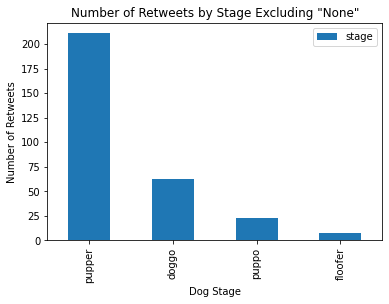

In [134]:
# graph the dataframe
stage_totals.plot(kind='bar', y ='stage')
plt.title('Number of Retweets by Stage Excluding "None"')
plt.xlabel('Dog Stage')
plt.ylabel('Number of Retweets');

## Analyzation and Visualization Task 2

In [135]:
# create dataframes containing only dogs in that 'stage'

pupper_df = dog_stages_df.loc[dog_stages_df['stage'] == 'pupper']
doggo_df = dog_stages_df.loc[dog_stages_df['stage'] == 'doggo']
puppo_df = dog_stages_df.loc[dog_stages_df['stage'] == 'puppo']
floofer_df = dog_stages_df.loc[dog_stages_df['stage'] == 'floofer']

In [136]:
# obtain the sum of retweets for each dataframe/dog 'stage'

pupper_retweets = sum(pupper_df['retweet_count'])
doggo_retweets = sum(doggo_df['retweet_count'])
puppo_retweets = sum(puppo_df['retweet_count'])
floofer_retweets = sum(floofer_df['retweet_count'])

In [137]:
# inspect the values and ensure they are still in int format (we had to change them from float earlier)
pupper_retweets, doggo_retweets, puppo_retweets, floofer_retweets

(514673, 448919, 161623, 38214)

In [138]:
# create a dictionary with the 'stage' as the key and the summed values obtained in the previous cell as the values

retweets_dict = {'Pupper': pupper_retweets, 'Doggo': doggo_retweets, 'Puppo': puppo_retweets, 'Floofer': floofer_retweets}

In [139]:
# turn the dictionary into a pandas series/dataframe

retweets_totals_df = pd.Series(retweets_dict)

In [140]:
# reset the index of the new series/dataframe for graphing purposes

retweets_totals_df.reset_index()

,index,0
0,Pupper,514673
1,Doggo,448919
2,Puppo,161623
3,Floofer,38214


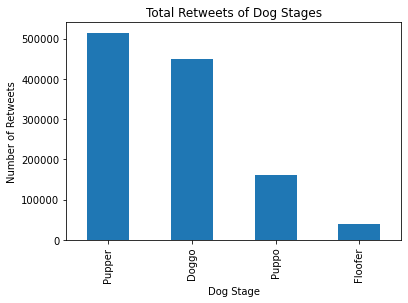

In [141]:
#graph the dataframe

retweets_totals_df.plot(kind='bar', y =0);
plt.title('Total Retweets of Dog Stages')
plt.xlabel('Dog Stage')
plt.ylabel('Number of Retweets');

## Analyzation and Visualization Task 3

In [142]:
# create a list of all numerator values from our master dataframe (as all denominator values are 10 and we can assume every rating is 'over ten'
# or 'x/10'
numerators_list = twitter_archive_master.rating_numerator.value_counts()

In [143]:
# turn the newly created value_counts list into a dataframe

numerators_list_df = pd.DataFrame(numerators_list)

In [144]:
numerators_list_df.reset_index(inplace=True)

In [145]:
# check newly created df

numerators_list_df

,index,rating_numerator
0,12,450
1,10,419
2,11,396
3,13,261
4,9,150
5,8,95
6,7,51
7,14,35
8,5,33
9,6,32


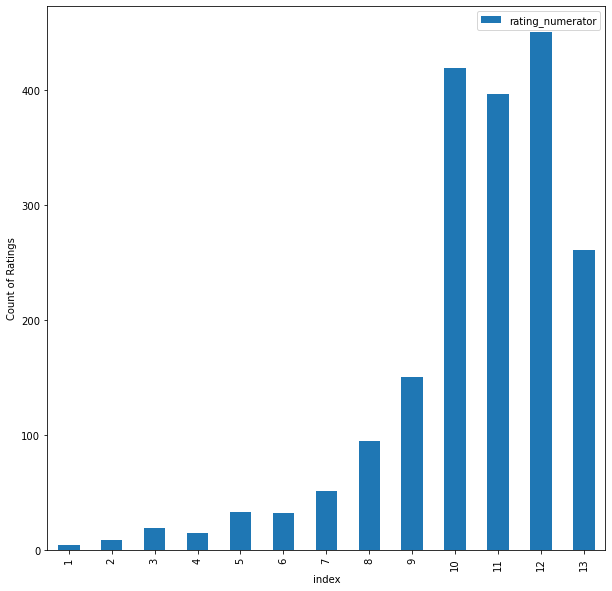

In [147]:
# graph information and make sure the numerator values on the x-axis are in order so we can visualize the distribution

field = 'index'
numerator_values = [1,2,3,4,5,6,7,8,9,10,11,12,13]
ax = numerators_list_df.set_index(field).loc[numerator_values].plot(kind='bar', figsize=(10,10))
ax.set_ylabel('Count of Ratings');